In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [7]:
# Using generator to process large amount of data by dividing data into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode = 'int', # Will give 0 to cats and 1 to dogs
    batch_size=32,
    image_size=(256,256) # Will reshape all the images to 256*256 pixels
)

Found 20000 files belonging to 2 classes.


In [8]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256) # Will reshape all the images to 256*256 pixels
)

Found 5000 files belonging to 2 classes.


In [9]:
# The above processing of image has stored the images in the form of numpy array where the values ranges from 0 to 255.
# Normalzation should be done in order to bring the data on the same scale.

In [10]:
# Normalize
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [11]:
#Create CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # Pooling Layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten()) # Flatten layer

# Fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 92ms/step - loss: 0.5788 - accuracy: 0.6871 - val_loss: 0.5443 - val_accuracy: 0.7326
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4423 - accuracy: 0.7897 - val_loss: 0.4340 - val_accuracy: 0.7996
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3209 - accuracy: 0.8572 - val_loss: 0.5235 - val_accuracy: 0.8026
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1907 - accuracy: 0.9219 - val_loss: 0.7762 - val_accuracy: 0.7984
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1098 - accuracy: 0.9585 - val_loss: 0.9838 - val_accuracy: 0.7794
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0800 - accuracy: 0.9712 - val_loss: 0.9404 - val_accuracy: 0.7826
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 1.2457 - val_accuracy:

In [15]:
import cv2

In [16]:
test_img=cv2.imread('/content/golden-retriever-dog-21668976.jpg')

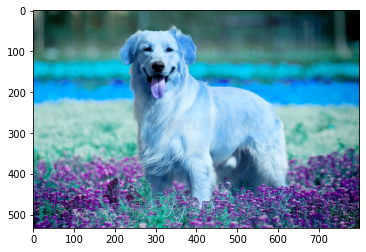

In [18]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [19]:
test_img.shape

(533, 800, 3)

In [20]:
test_img=cv2.resize(test_img,(256,256))

In [21]:
test_input=test_img.reshape((1,256,256,3))

In [22]:
test_input

array([[[[145, 148, 133],
         [145, 150, 139],
         [139, 145, 136],
         ...,
         [  1,  13,   9],
         [  1,  17,  13],
         [  2,  17,  13]],

        [[144, 147, 132],
         [144, 149, 138],
         [137, 145, 135],
         ...,
         [  2,  14,  10],
         [  3,  17,  13],
         [  2,  16,  12]],

        [[141, 144, 129],
         [141, 145, 134],
         [134, 142, 132],
         ...,
         [  2,  12,   9],
         [  2,  13,  10],
         [  1,  12,   8]],

        ...,

        [[ 77,   8, 125],
         [ 24,   3,  73],
         [ 65,   3,  76],
         ...,
         [ 61,  89, 110],
         [  7,  24,  12],
         [  0,  14,  10]],

        [[ 54,   6, 108],
         [ 35,   2,  86],
         [ 31,   0,  82],
         ...,
         [ 25,  21,  33],
         [ 32,  28,  31],
         [ 11,  11,  10]],

        [[114,  73, 163],
         [ 75,   0, 118],
         [ 38,   5, 100],
         ...,
         [ 32,  63,  65],
        

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 302ms/step


array([[1.]], dtype=float32)